In [1]:
# Code modified by Vishnu Mahesh on 03/19/19
import numpy as np
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt
#below is to make plots show up in the notebook
%matplotlib inline

In [2]:
# Code Block 2

# distance and elevation data along the survey line

field_dist = np.array([0,1,2,3,4,4.99,5.99,6.99,7.99,8.99,9.99,10.99,11.99,
                       12.99,13.99,14.98,15.98,16.98,17.98,18.98,19.98,
                       20.98,21.98,22.98,23.98,24.97,25.97,26.97,27.97,
                       28.97,29.97,30.97,31.97,32.97,33.97,34.96,35.96,
                       36.96,37.96,38.96,39.96,40.96,41.96,42.96,43.95,
                       44.95,45.95,46.95,49.95,50.95,51.95,52.95,53.94,
                       54.94,55.94,56.94,57.94,58.94,59.94,60.94,61.94,
                       62.94,63.93,64.93,65.93,66.93,67.93,68.93,69.93,
                       70.93,71.93,72.92,73.92,74.92,75.92,76.92,77.92,
                       78.92,79.92,80.92,81.92,82.91,83.91,84.91,85.91,
                       86.91,87.91,88.91])                    
field_z = np.array([0,0.03,0.3,0.47,0.62,0.83,1.09,1.31,1.54,1.8,2.14,2.38,
                    2.55,2.84,3.15,3.49,3.78,4.05,4.41,4.57,4.77,5.05,5.29,
                    5.46,5.68,5.96,6.4,6.81,6.99,7.21,7.45,7.63,7.79,7.87,
                    8.06,8.24,8.4,8.51,8.65,8.68,8.82,8.98,9.01,9.04,9.05,
                    9.09,9.07,9.07,9.02,8.93,8.9,8.83,8.73,8.62,8.47,8.28,
                    8.22,8,7.82,7.75,7.39,7.2,7.04,6.79,6.6,6.39,6.1,5.77,
                    5.5,5.3,5.11,4.89,4.64,4.5,4.32,4.1,3.96,3.6,3.19,2.92,
                    2.73,2.41,2.12,1.76,1.21,0.95,0.56,0.06])

In [3]:

# Code Block 3

from landlab import RasterModelGrid
mg = RasterModelGrid((90, 5), 1.0) # make grid
z_vals = mg.add_ones('topographic__elevation', at='node') # initialize z values

# Set initial conditions
initial_elevation = np.multiply(z_vals, -1.0) # this line and next set elevation to 87. m
z_vals += initial_elevation

# Set boundary conditions
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

# Initialize values for plotting variables down the middle of the hillslope

ycoord_rast = mg.node_vector_to_raster(mg.node_y)
ys_grid = ycoord_rast[:, 2]

In [36]:
# Code Block 4

from landlab.components import LinearDiffuser
D = 0.0011 # value in m^2/yr
lin_diffuse = LinearDiffuser(mg, linear_diffusivity=D)

# Uniform rate of rock uplift, which drives uniform erosion at steady state
uplift_rate = 0.00001  # m/year, start with 1e-5 m/yr

# Total time in years that the model will run for.
runtime = 1000000 # years

# Stability criteria for timestep dt.  Coefficient can be changed
# depending on our tolerance for stability vs tolerance for run time.
# Do not change this.
dt = 0.5 * mg.dx * mg.dx / D

print("dt", dt)

# nt is number of time steps
nt = int(runtime // dt)

# Below is to keep track of time for labeling plots
time_counter = 0

# length of uplift over a single time step, meters
uplift_per_step = uplift_rate * dt

dt 454.5454545454545


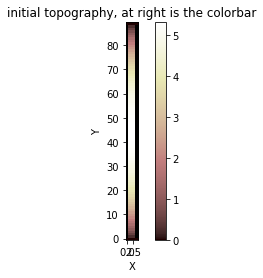

<Figure size 432x288 with 0 Axes>

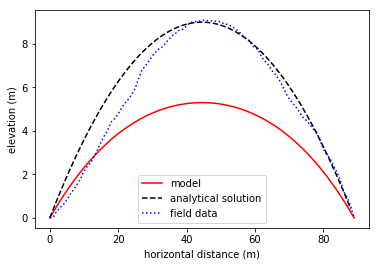

In [38]:
# Code Block 5

#ANALYTICAL SOLUTION
ys = np.arange(mg.number_of_node_rows*mg.dx-mg.dx)

# location of divide or ridge crest -> middle of grid 
# based on boundary conds.
divide_loc = (mg.number_of_node_rows*mg.dx-mg.dx)/2

# half-width of the ridge
half_width = (mg.number_of_node_rows*mg.dx-mg.dx)/2

# analytical solution for elevation under linear diffusion at steady state
zs = (uplift_rate/(2*D)) * \
     (np.power(half_width, 2) - np.power(ys - divide_loc, 2))

#PLOTTING
plt.figure()
imshow_grid(mg, 'topographic__elevation')
plt.title('initial topography, at right is the colorbar')
plt.figure()
elev_rast = mg.node_vector_to_raster(
            mg.at_node['topographic__elevation'])
plt.figure()
plt.plot(ys_grid, elev_rast[:, 2], 'r-', label='model')
plt.plot(ys, zs, 'k--', label='analytical solution')
plt.plot(field_dist, field_z, 'b:', label='field data')
plt.xlabel('horizontal distance (m)')
plt.ylabel('elevation (m)')
plt.legend(loc='lower center')
#plt.title('before running model')

In [40]:
# Code Block 6

for i in range(nt):
    mg['node']['topographic__elevation'][mg.core_nodes] += uplift_per_step
    lin_diffuse.run_one_step(dt)
    time_counter += dt
    
print('time evolved for ',time_counter,' years')

time evolved for  999999.9999999614  years


Text(0.5, 1.0, 'topographic cross section at time 999999.9999999614, with D = 0.0011 m^2/yr')

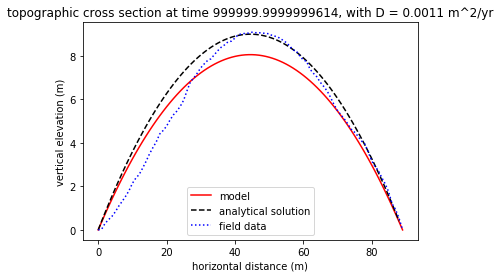

In [41]:

# Code Block 7
plt.figure()
elev_rast = mg.node_vector_to_raster(
            mg.at_node['topographic__elevation'])
plt.plot(ys_grid, elev_rast[:, 2], 'r-', label='model')
plt.plot(ys, zs, 'k--', label='analytical solution')
plt.plot(field_dist, field_z, 'b:', label='field data')
plt.xlabel('horizontal distance (m)')
plt.ylabel('vertical elevation (m)')
plt.legend(loc='lower center')
plt.title('topographic cross section at time %s, with D = %s m^2/yr'%(time_counter,D))